# Matplotlib Crash Course

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# override my personal default style settings for consistency
plt.style.use('default')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Matplotlib Object Hierarchy

Matplotlib plots consist of a hierarchy of python objects, and understanding this hierarchy will be essential for customizing your plots.

[More details](https://realpython.com/python-matplotlib-guide/#the-matplotlib-object-hierarchy)

1. Figure
2. Axes
3. Axis

Most of the customization is done at the `Axes` level even if it is done on a specific `Axis` (e.g., setting the label of the x-axis).

<img src="fig_map.png" alt="Matplotlib Object Hierarchy" width="600"/>

### Let's start by creating a Figure object (`fig`) and an Axes objects (`ax`)

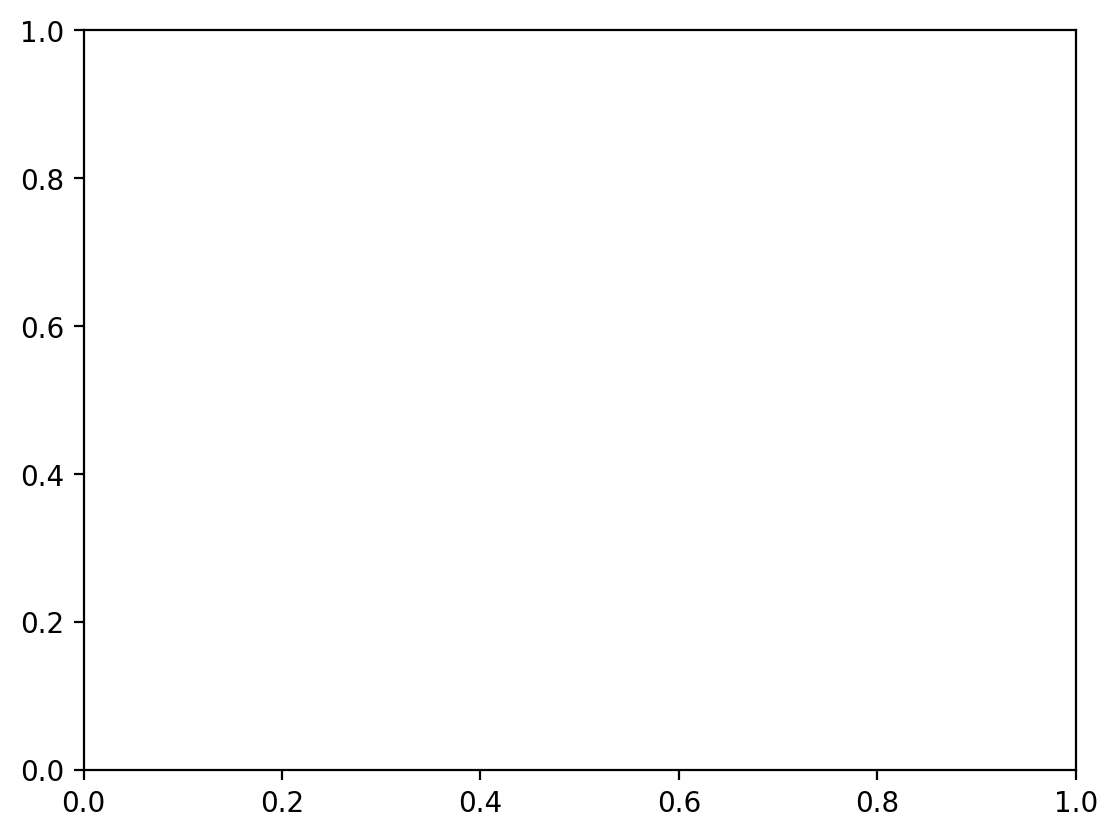

In [2]:
fig, ax = plt.subplots()

In [3]:
type(fig)

matplotlib.figure.Figure

In [4]:
type(ax)

matplotlib.axes._axes.Axes

In [5]:
ax

<Axes: >

### We can also create multiple Axes objects in the same Figure with `plt.subplots()`.

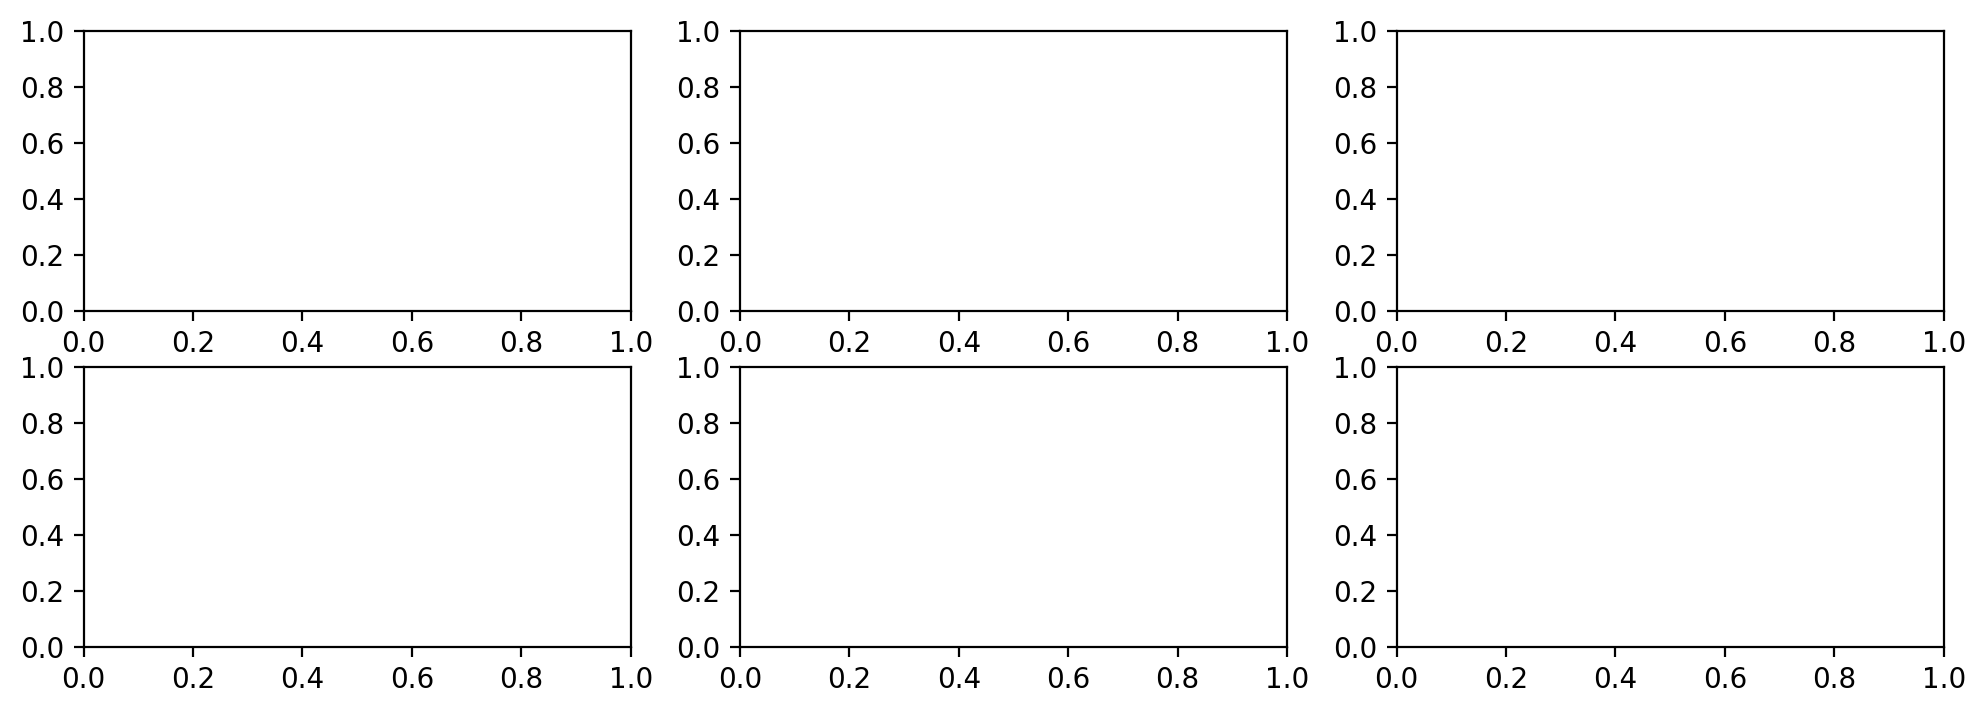

In [6]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 4))

Now `axes` is an Numpy array of Matplotlib `Axes` objects:

In [7]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

### Let's add add data to our Axes.
The simplest ways to show data are as a line plot or a scatter plot.

#### Line plot

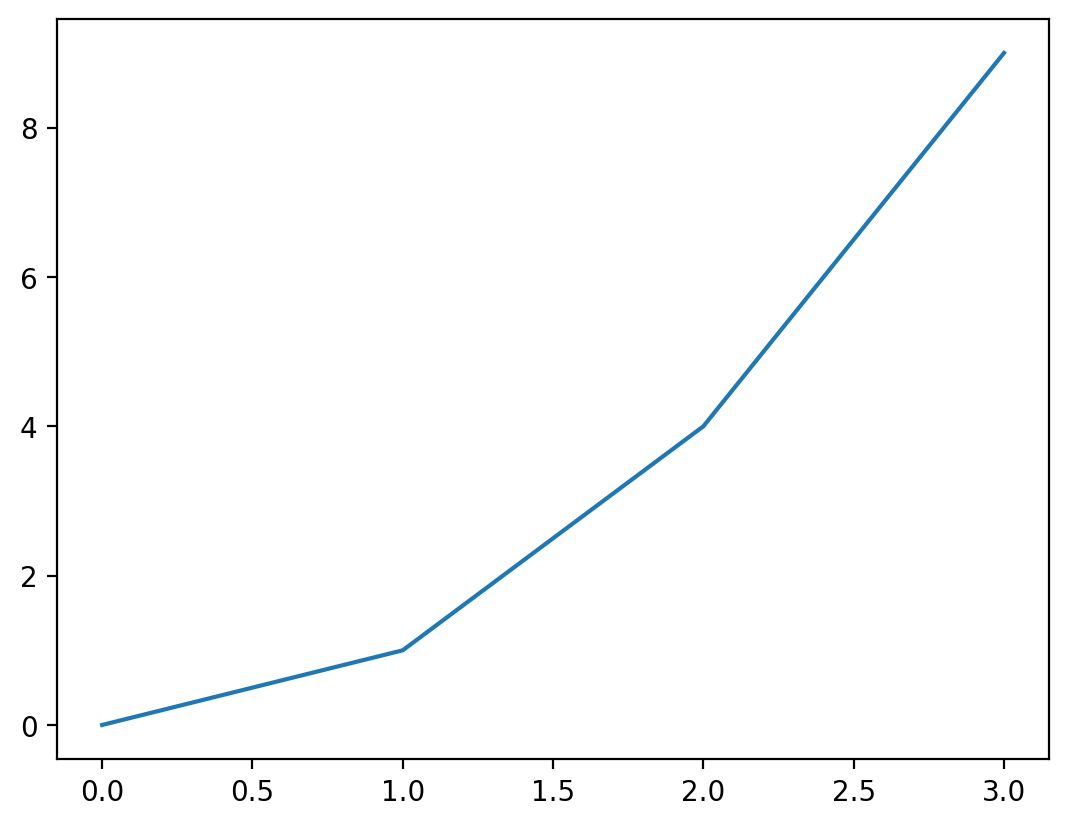

In [8]:
time = np.array([0, 1, 2, 3])
papers = np.array([0, 1, 4, 9])

fig, ax = plt.subplots()
ax.plot(time, papers)

#### Scatter Plot

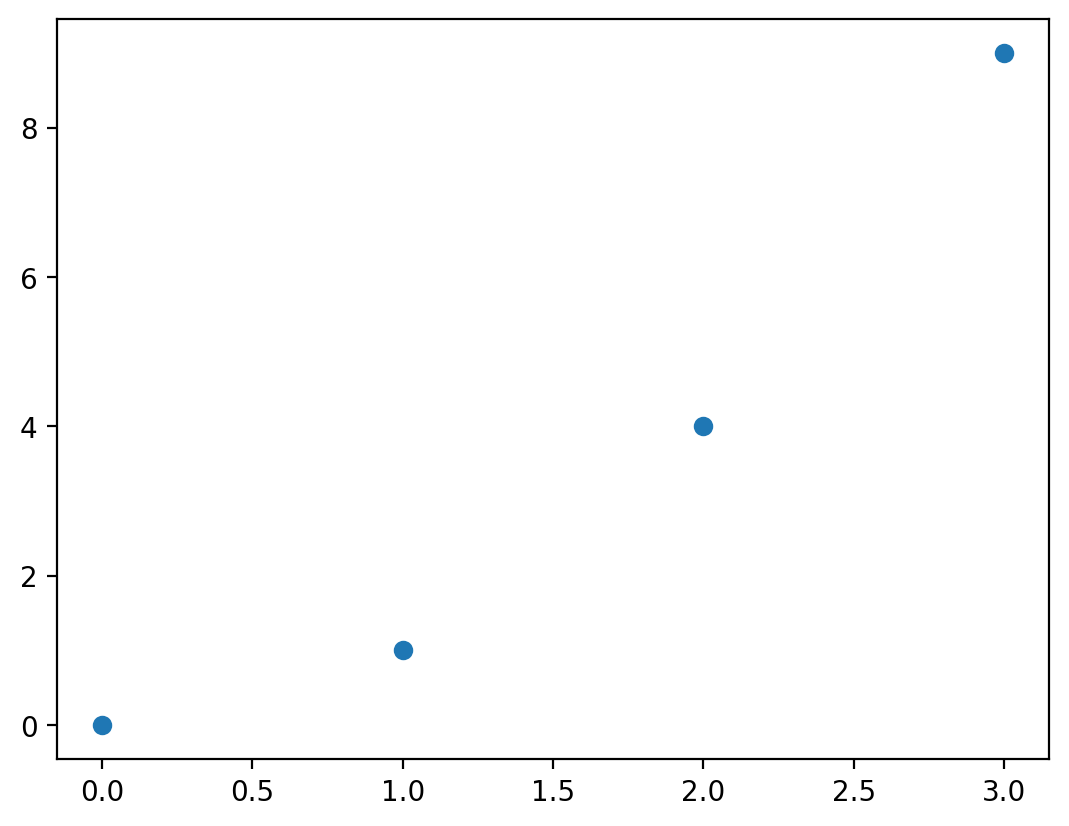

In [9]:
fig, ax = plt.subplots()
ax.scatter(time, papers)

## Customizing Our Plot: Anatomy of a Matplotlib Figure

We can now create a figure with axes that shows our data, however, we need to include more context so that others will understand our plot. 

[Anatomy of a Figure (Matplotlib docs)](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

<img src="fig_anatomy.png" alt="Anatomy of a Figure" width="600"/>

### Exercise 1
Add an x-axis label, a y-axis label, and a title to our Axes by using its `set_<property>` methods, where `<property>` is `xlabel`, `ylabel`, or `title` (e.g., `ax.set_xlabel('time')`).



Text(0.5, 1.0, 'Productivity')

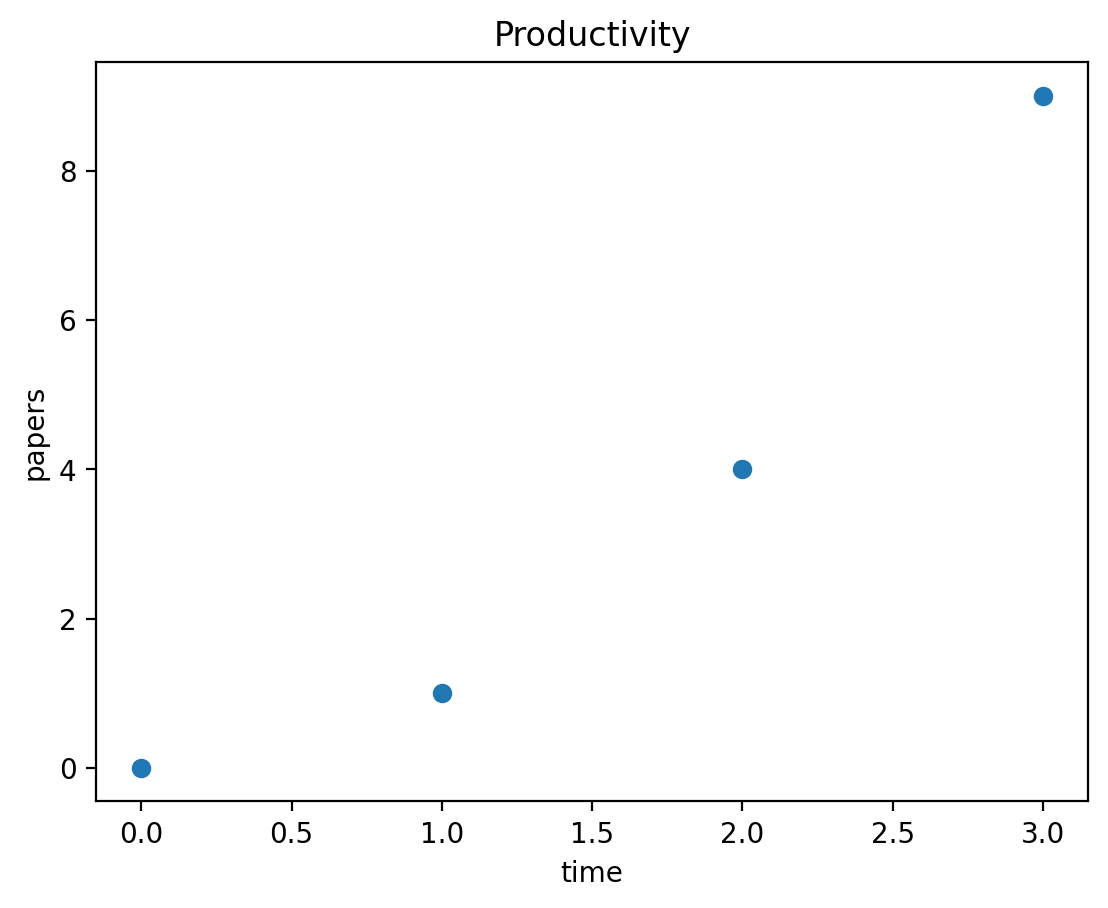

In [10]:
fig, ax = plt.subplots()
ax.scatter(time, papers)

### ADD CODE HERE ###
ax.set_xlabel('time')
ax.set_ylabel('papers')
ax.set_title('Productivity')
#####################

### Exercise 2
Matplotlib does a good job of automatically adjusting the x and y limits to show our data, but often we will want to customize these limits. Try setting the `xlim` to go from -0.5 to 6 and the `ylim` to go from -0.5 to 40.

(-0.5, 40.0)

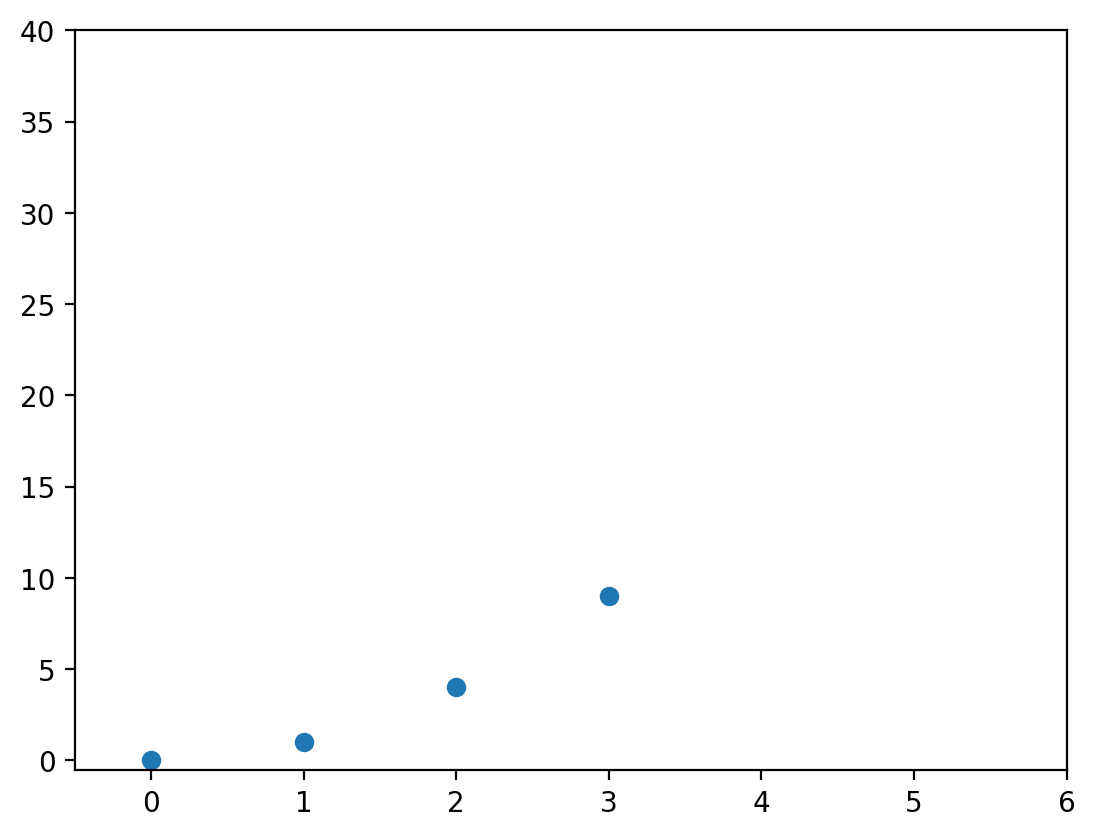

In [11]:
fig, ax = plt.subplots()
ax.scatter(time, papers)

### ADD CODE HERE ###
ax.set_xlim(-0.5, 6)
ax.set_ylim(-0.5, 40)
#####################

## Exercise 3

We will often want to change which ticks appear on an axis and alter their styling (e.g., fontsize). Try setting the yticks to be 1, 3, 5 (using `ax.set_yticks`) and then changing their labels (to be other numbers or strings) and increasing the fontsize to 20.

[Text(0, 1, '1.00'), Text(0, 3, '3'), Text(0, 5, 'five')]

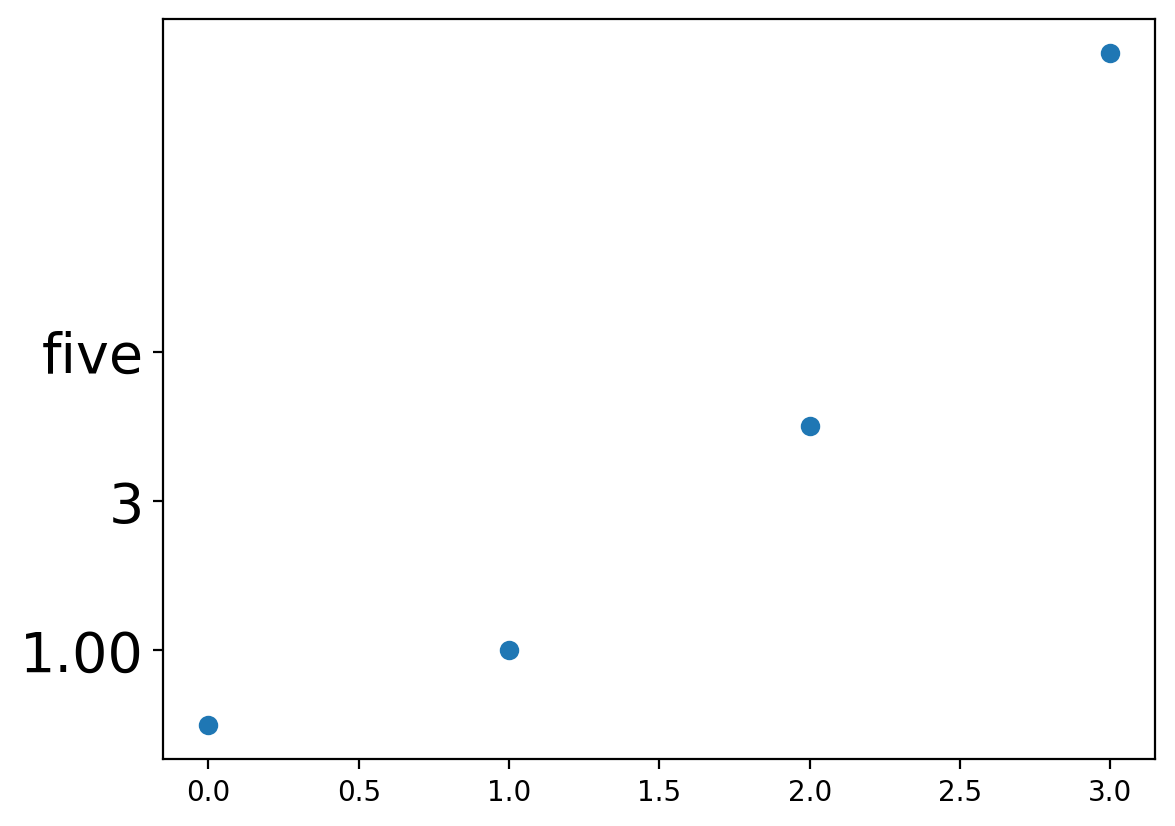

In [12]:
fig, ax = plt.subplots()
ax.scatter(time, papers)

### ADD CODE HERE ###
ax.set_yticks([1, 3, 5])
ax.set_yticklabels(["1.00", 3, "five"], fontsize=20)
#####################


Often we will want to show multiple data sets to make comparisons.

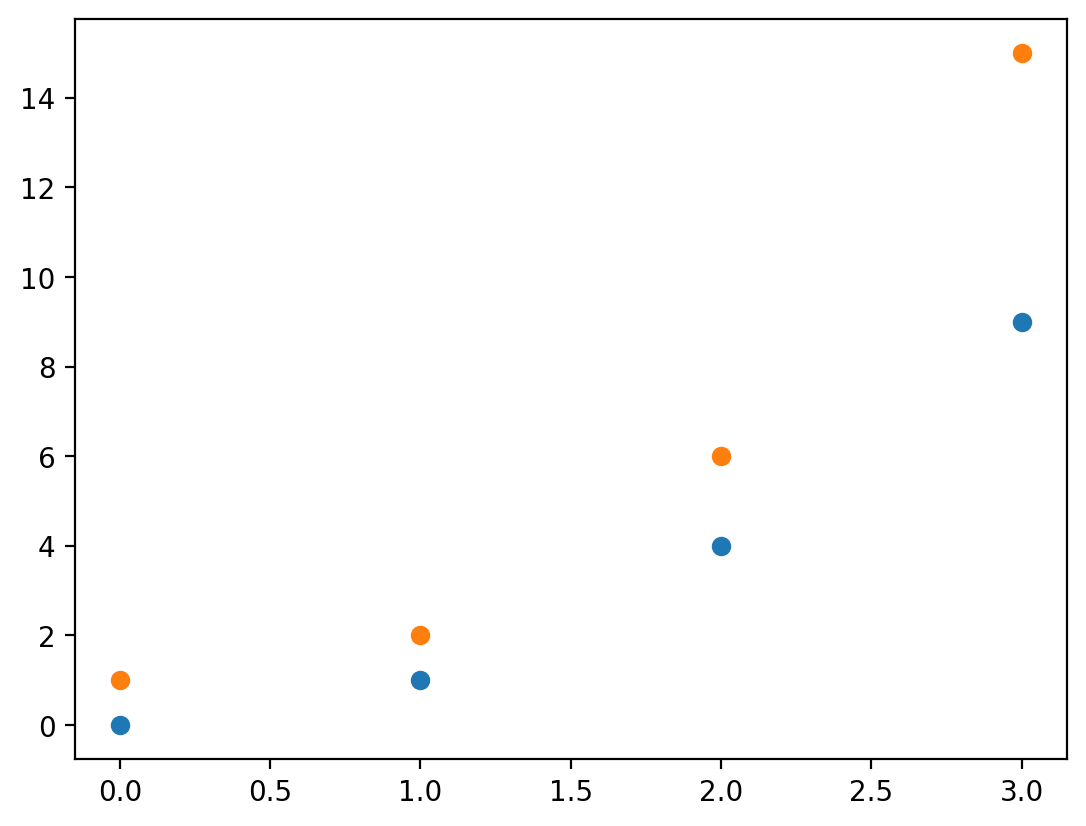

In [13]:
talks = np.array([1, 2, 6, 15])

fig, ax = plt.subplots()
ax.scatter(time, papers)
ax.scatter(time, talks)

## Exercise 4
Add a legend to help the reader distinguish between data sets by labeling each data set (using the `label` keyword argument in `ax.scatter()`) and then creating a legend with the `legend()` method of Axes.

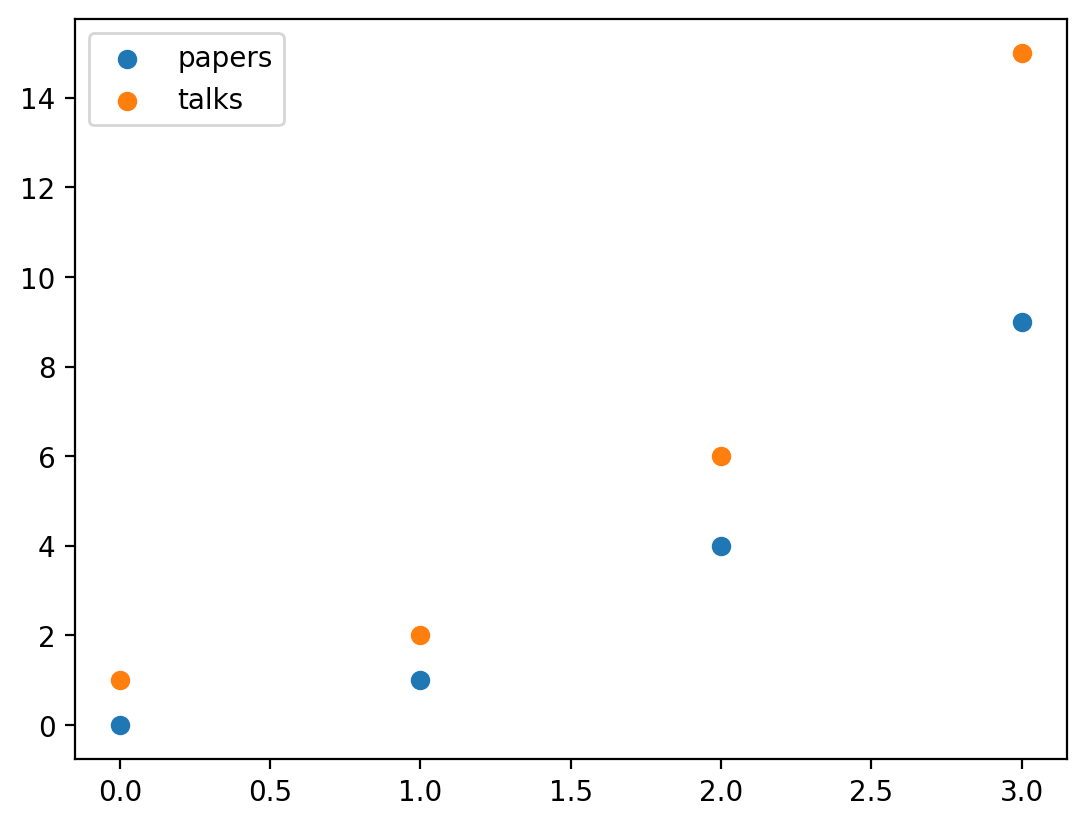

In [14]:
fig, ax = plt.subplots()

### ADD CODE HERE ###
ax.scatter(time, papers, label='papers')
ax.scatter(time, talks, label='talks')

ax.legend()
#######################

## Exercise 5

Make a two panel (one above the other) plot with one panel showing papers vs. time and the other showing talks vs. time.  If you can, try to set the y-limits to be the same (-1, 16) for each panel using a for-loop over `axes`.

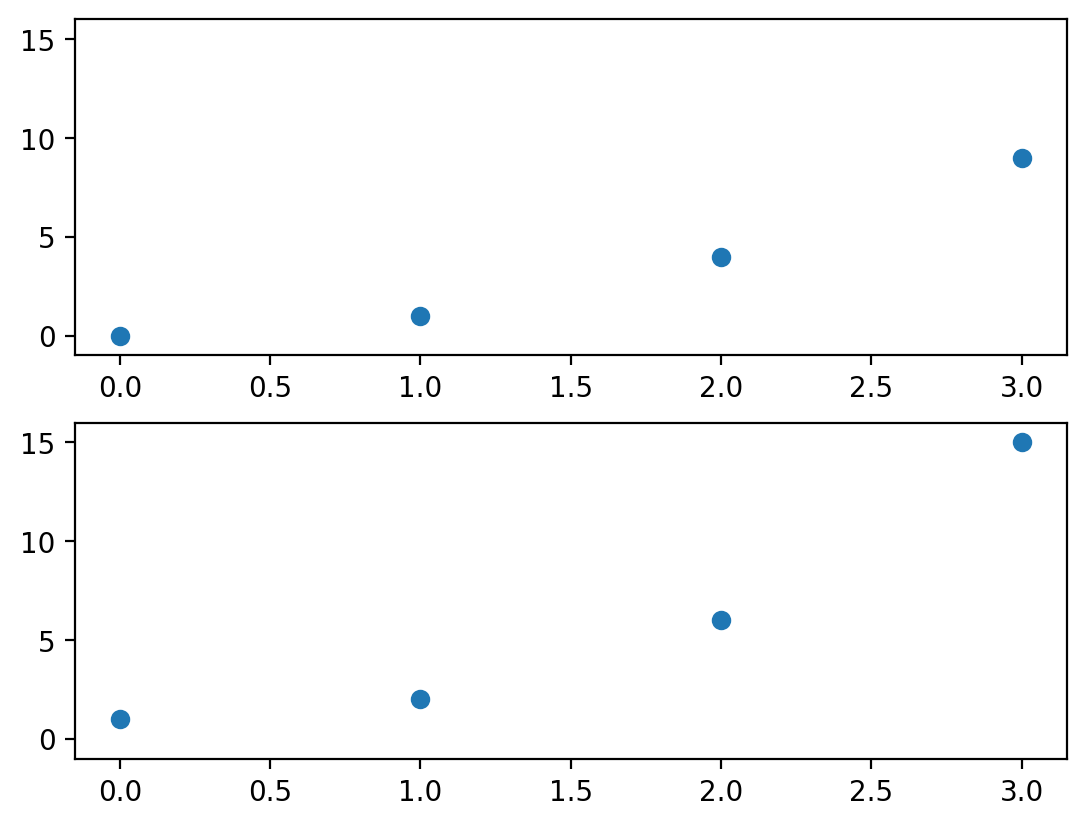

In [15]:
### ADD CODE HERE ###
fig, axes = plt.subplots(nrows=2)

axes[0].scatter(time, papers)
axes[1].scatter(time, talks)

for ax in axes:
    ax.set_ylim(-1, 16)
########################

## Exercise 6
Save your beautiful plot using `savefig()`.

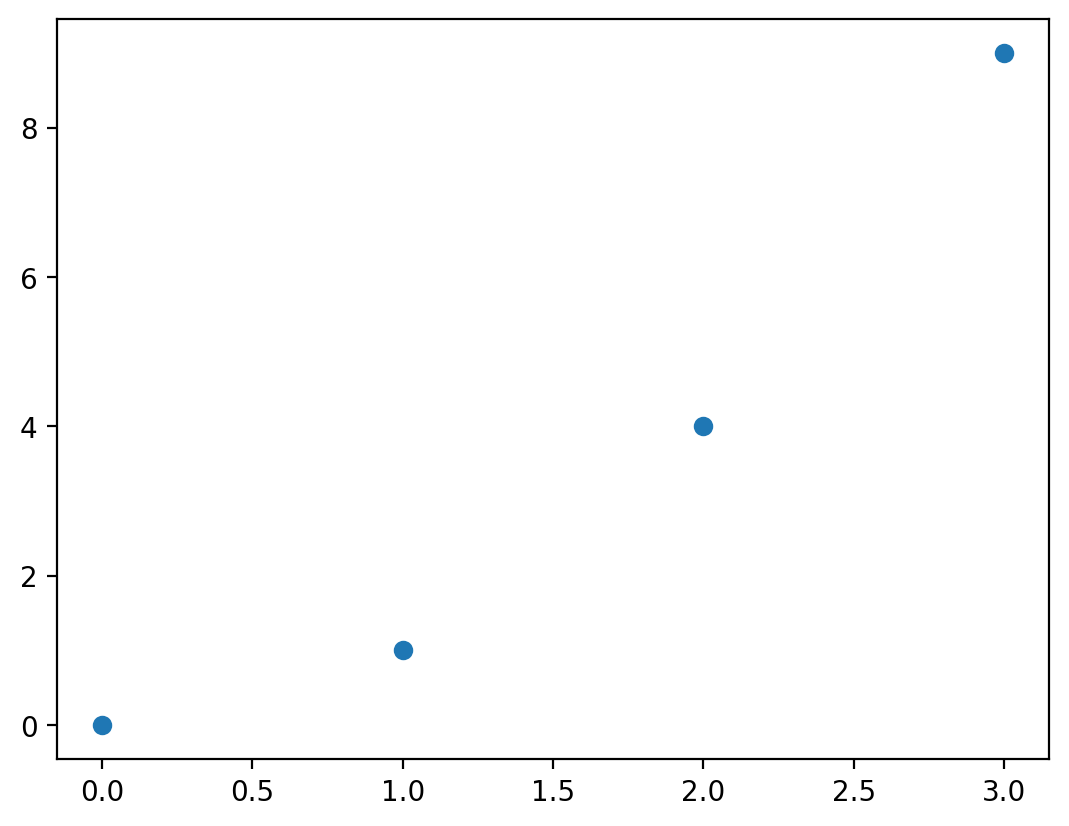

In [16]:
fig, ax = plt.subplots()
ax.scatter(time, papers)

### ADD CODE HERE ###
fig.savefig('myplot.pdf')
######################

### Real Data
Now that we're getting comfortable with making plots with our simple data set, let's load a real data set to explore some fun visualizations for a large data set.

In [17]:
# load the data
import pandas as pd
data = pd.read_csv('dr14_dwarfs_data.csv')
teff = data['Teff'].values
logg = data['log(g)'].values
feh = data['[Fe/H]'].values

Let's plot the data

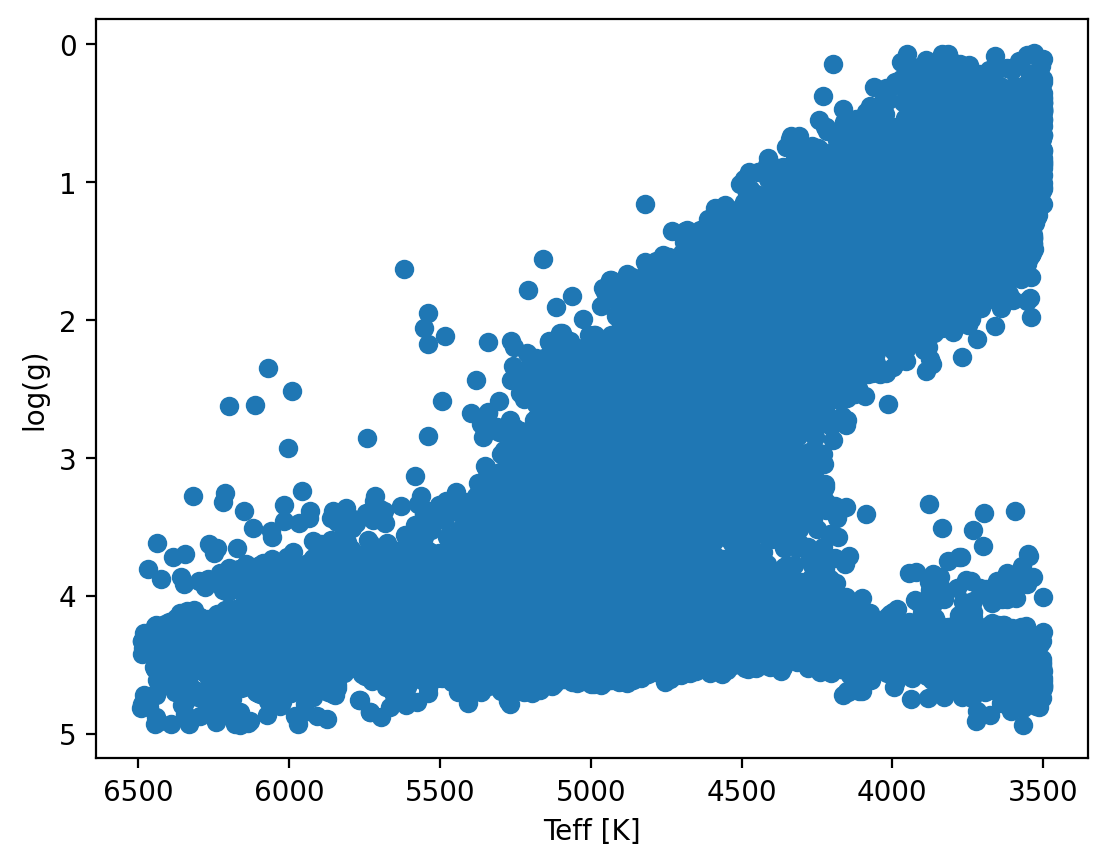

In [18]:
fig, ax = plt.subplots()
ax.scatter(teff, logg)

ax.plot([5000, 3500], [3.5, 1])

ax.set_xlabel('Teff [K]')
ax.set_ylabel('log(g)')

# we'll invert the axis directions because that is how Kiel diagrams are usually shown
ax.invert_xaxis()
ax.invert_yaxis()

## Interactive Plotting in Jupyter

Jupyter (notebook or lab) allows you to specify a `matplotlib magic` command to tell `matplotlib` where to direct the plotting. We have been using static plots by default, but we could generate an interactive plot using:

`%matplotlib widget`

which allows us to pan/zoom and explore the data shown in the plot.

In [30]:
%matplotlib widget

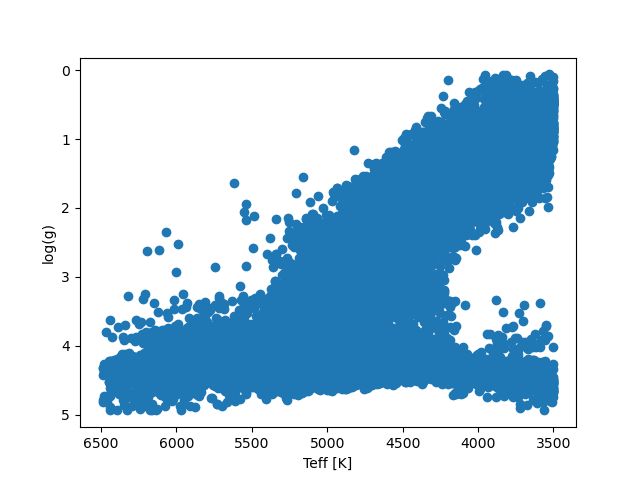

In [31]:
fig, ax = plt.subplots()
ax.scatter(teff, logg)

ax.plot([5000, 3500], [3.5, 1])

ax.set_xlabel('Teff [K]')
ax.set_ylabel('log(g)')

# we'll invert the axis directions because that is how Kiel diagrams are usually shown
ax.invert_xaxis()
ax.invert_yaxis()

We can switch back to static plots using:

`%matplotlib inline`We can switch back to static plots using:

`%matplotlib inline`

In [32]:
%matplotlib inline

### Styling Scatter Plots


## Exercise 7

Change the color (using the `c` or `color` or `facecolor` keyword) of the points to red and reduce their size (using the `s` keyword) to 0.1. Then change the color (using the `c` or `color` keyword) of the line to black and set its thickness (using the `lw` or `linewidth`) to 2.

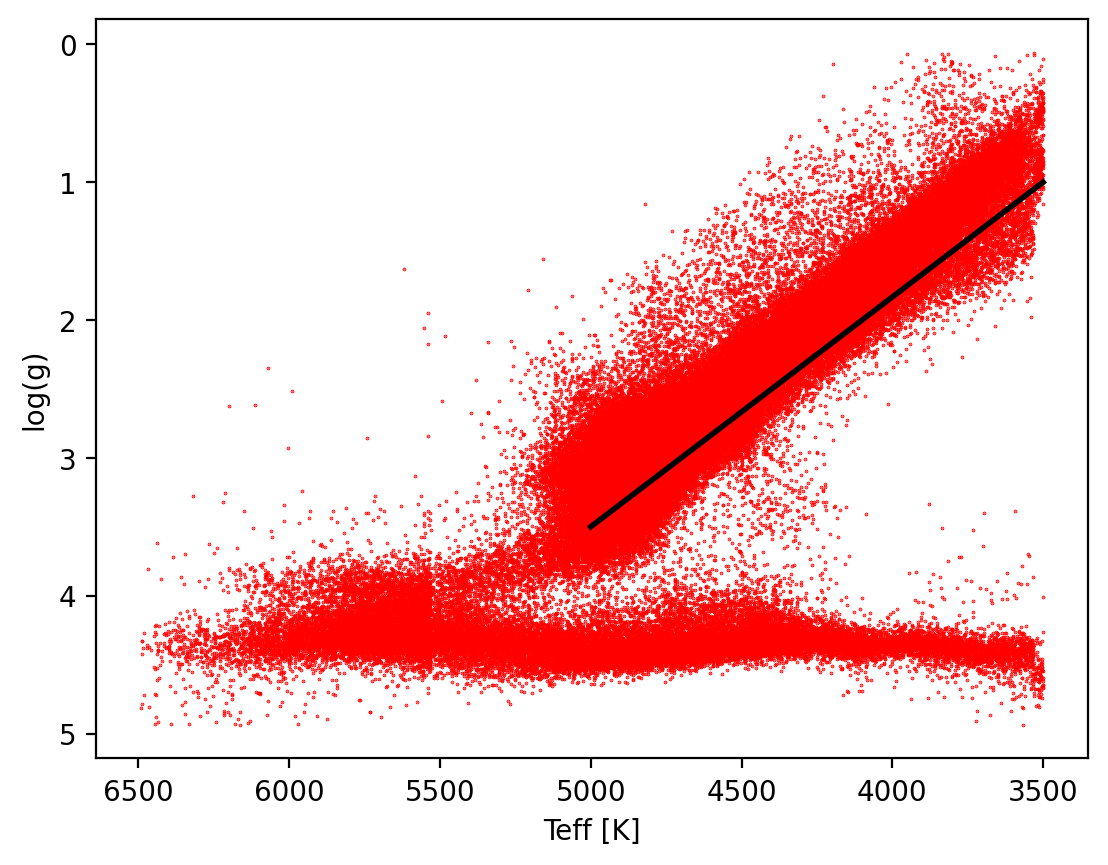

In [34]:
fig, ax = plt.subplots()

### ADD CODE HERE ###
ax.scatter(teff, logg, c='red', s=0.1)
ax.plot([5000, 3500], [3.5, 1], c='black', linewidth=2)
#####################

ax.set_xlabel('Teff [K]')
ax.set_ylabel('log(g)')

ax.invert_xaxis()
ax.invert_yaxis()

### Colormaps

## Exercise 8
We can color-code the points by a 3rd variable by setting the color to be that variable (in this case use `feh`).  We then need to make a colorbar using `fig.colorbar()`, where we need to pass in the scatter object that has the colored data points, so we first need to assign that to a variable (in this case I've used `p`). Finally, set the label of the color bar.

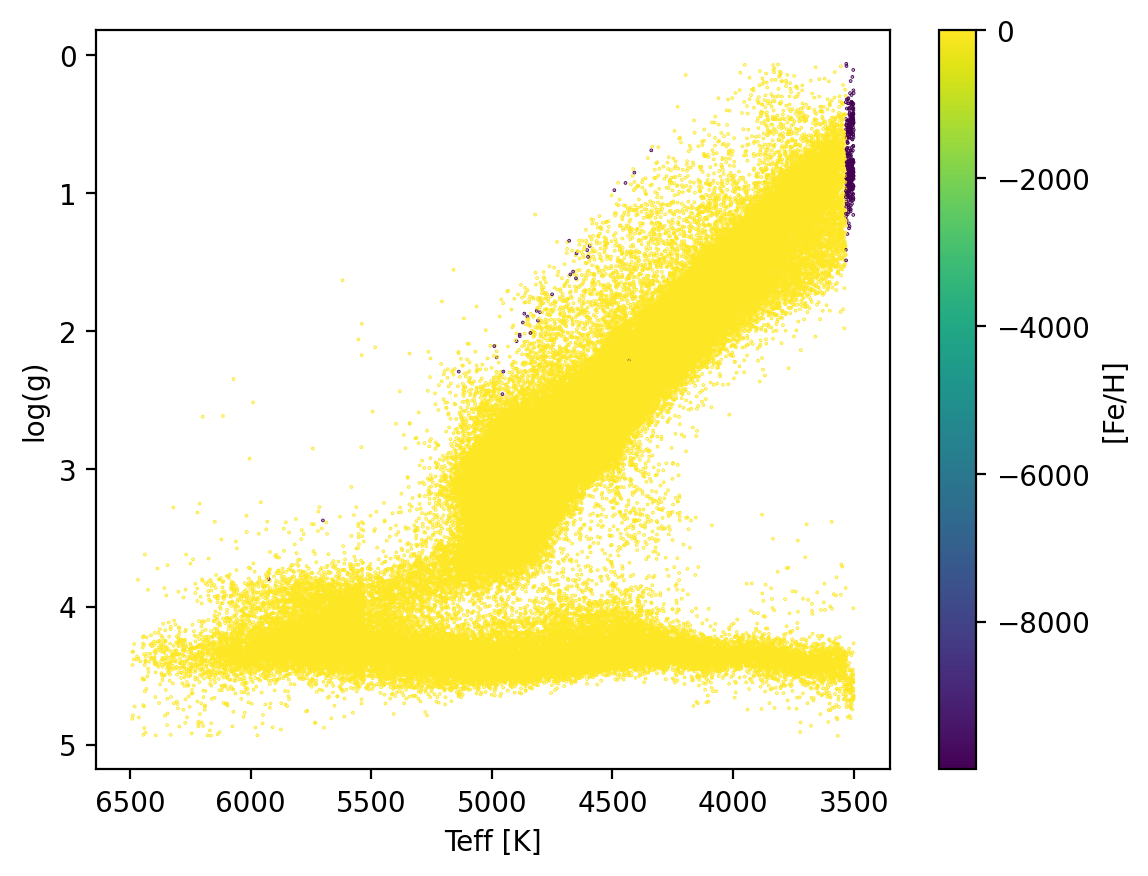

In [35]:
fig, ax = plt.subplots()

### ADD CODE HERE ###
p = ax.scatter(teff, logg, c=feh, s=0.1)
cb = fig.colorbar(p)
cb.set_label('[Fe/H]')
#####################

ax.set_xlabel('Teff [K]')
ax.set_ylabel('log(g)')

ax.invert_xaxis()
ax.invert_yaxis()

## Exercise 9

Hmmm...the limits on metallicity ([Fe/H]) should really be more like -2.5 to 1, so let's use the `vmin` and `vmax` keywords in `ax.scatter()` to limit the range.

Note: the Sun's metallicity is 0 by definition and [Fe/H] is on a log10 scale.

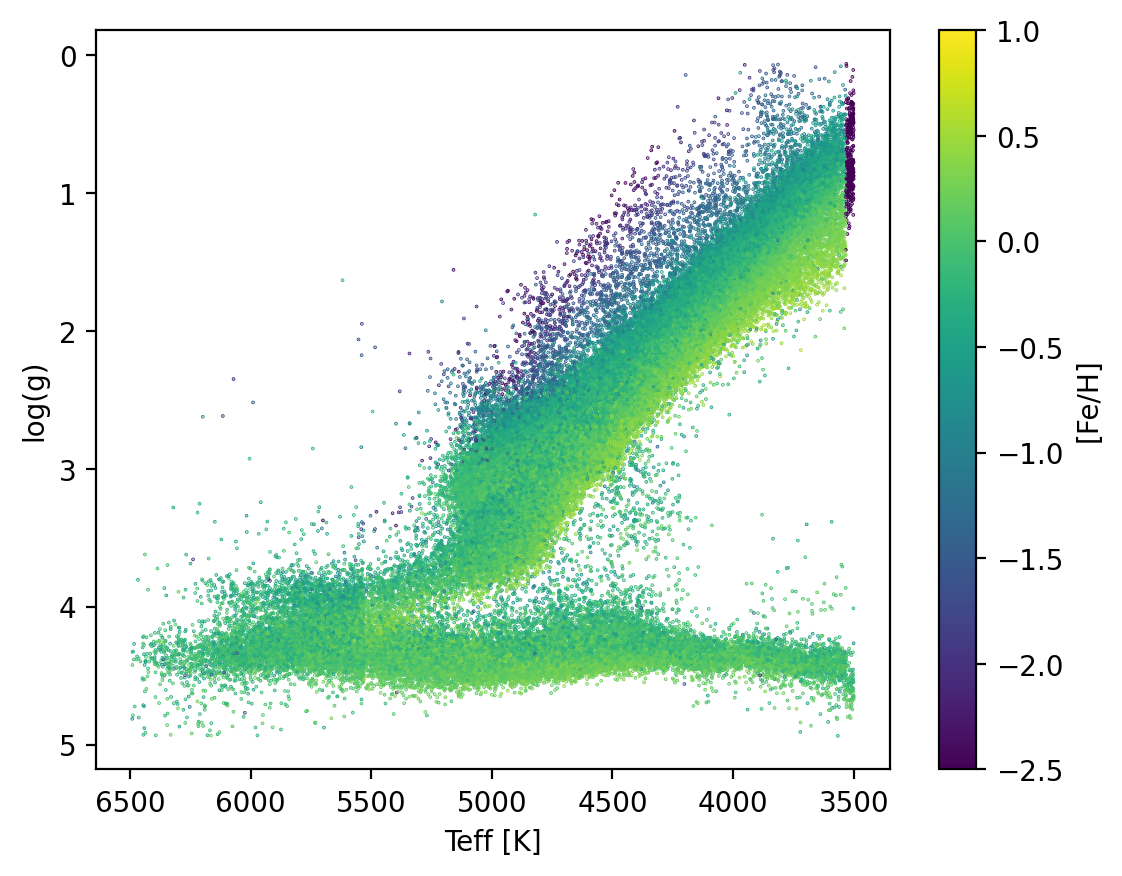

In [36]:
fig, ax = plt.subplots()

### ADD CODE HERE ###
p = ax.scatter(teff, logg, c=feh, s=0.1, vmin=-2.5, vmax=1)
cb = fig.colorbar(p)
cb.set_label('[Fe/H]')
#####################

ax.set_xlabel('Teff [K]')
ax.set_ylabel('log(g)')

ax.invert_xaxis()
ax.invert_yaxis()

#### 1-D Histograms

Let's inspect our data set by making a histogram of the surface gravities (`logg`).

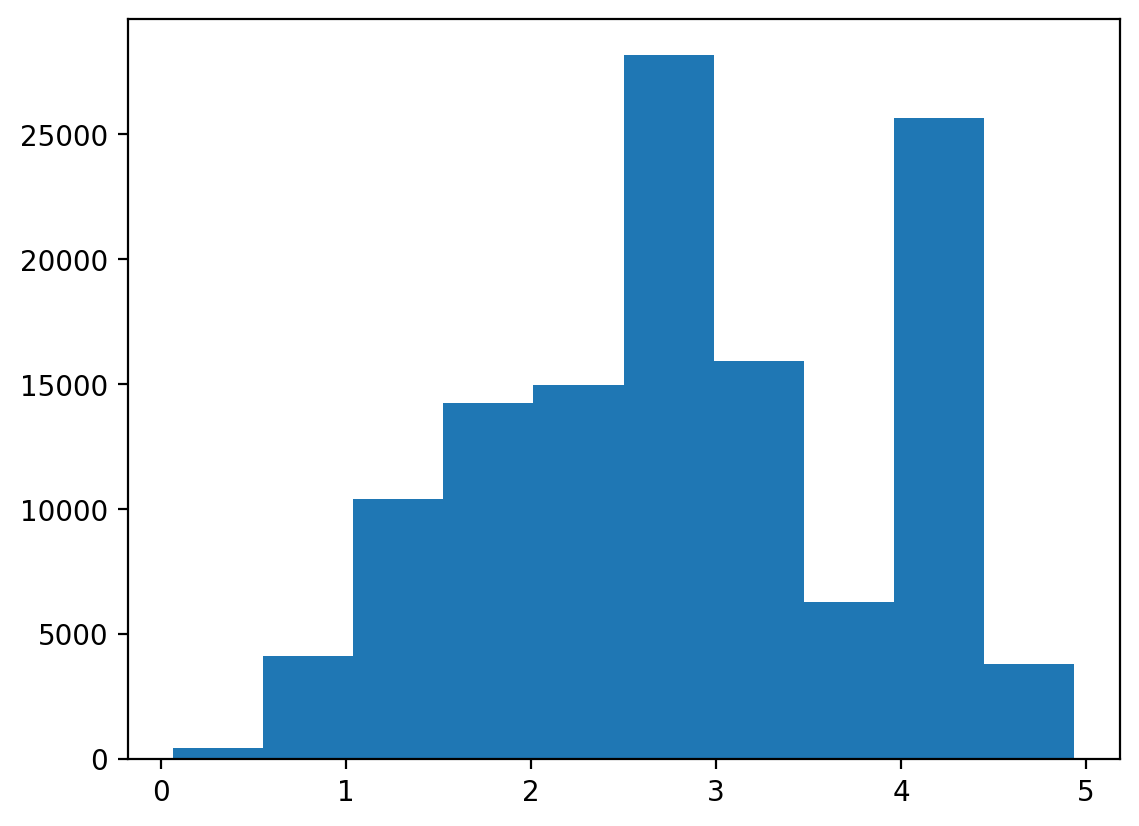

In [37]:
fig, ax = plt.subplots()
cnt, bin_edges, patches = ax.hist(logg)

`ax.hist()` returns 3 objects:
1. the count in each bin (`cnt`)
2. the bin edges (`bin_edges`)
3. the individual rectangles that make up the histogram (`patches`), which we will ignore

## Exercise 10

Make a histogram with 100 bins.

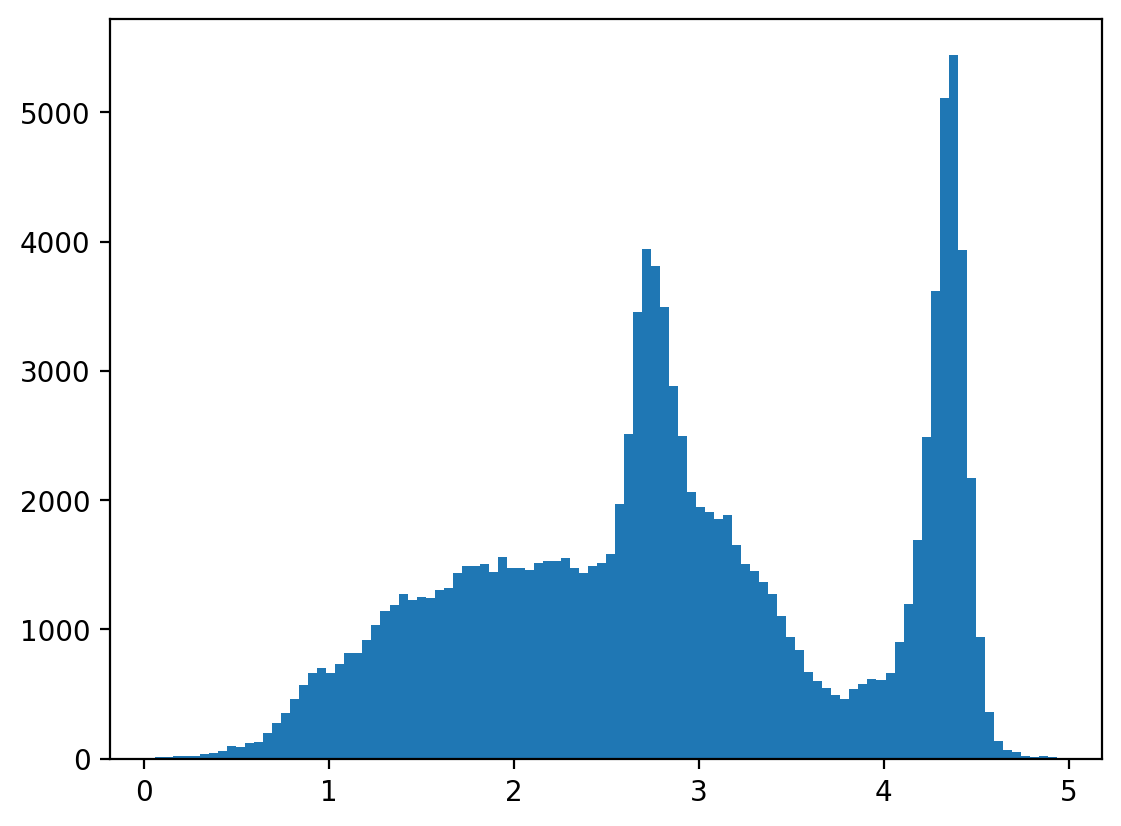

In [38]:
fig, ax = plt.subplots()

### ADD CODE HERE ###
cnt, bin_edges, patches = ax.hist(logg, bins=100)
#####################

## Exercise 11
Make a 2-D histogram (`ax.hist2d()`) of the Teff and log(g) data to show the density of stars in this space.  Try using 100 bins in each dimension. `ax.hist2d()` will return 4 objects: 2-D array of counts, x bin edges, y bin edges, and the image.  Finally, add a labeled colorbar.

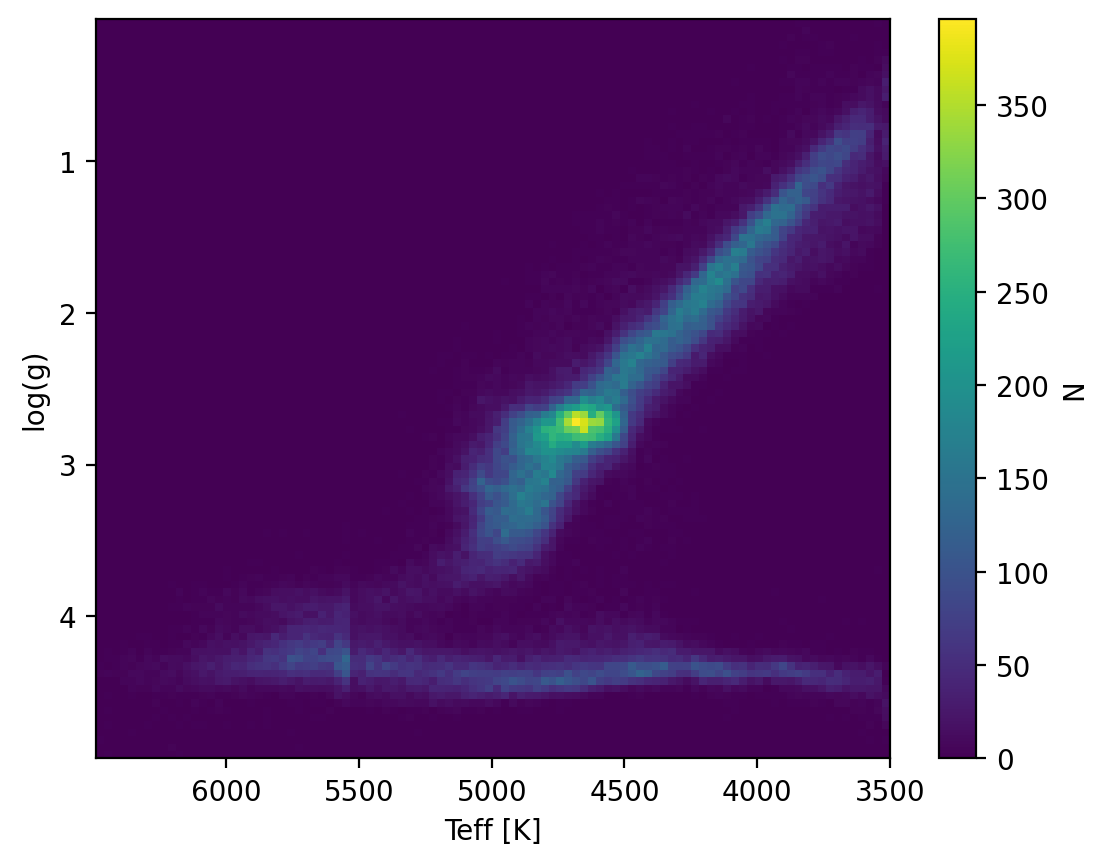

In [39]:
fig, ax = plt.subplots()

### ADD CODE HERE ###
cnt, x_bin_edges, y_bin_edges, p = ax.hist2d(teff, logg, bins=(100, 100))
cb = fig.colorbar(p)
cb.set_label('N')
#####################

ax.set_xlabel('Teff [K]')
ax.set_ylabel('log(g)')

ax.invert_xaxis()
ax.invert_yaxis()

Aha! In 2-D we can clearly see that the peak in the 1-D histogram at `logg` ~ 4.3 is a superposition of dwarf stars at all temperatures.  However, the peak in the 1-D histogram at `logg` ~ 2.8 is localized in temperature.  These stars are known as "red clump" stars. They have already ascended the red giant branch (the sequence from the center to the upper right) and are now burning He in their cores, so they form the reddest part of the horizontal branch.

## Exercise 12
Let's try two different ways of showing a variable with a log scaling using a histogram of `teff`.  First, try taking the log10 (`np.log10()`) of the variable and plotting this new variable (remember to change the axis label).  Second, we will plot the histogram in linear scale and set the scale of the x-axis as log afterwards (using `ax.set_xscale('log')`).

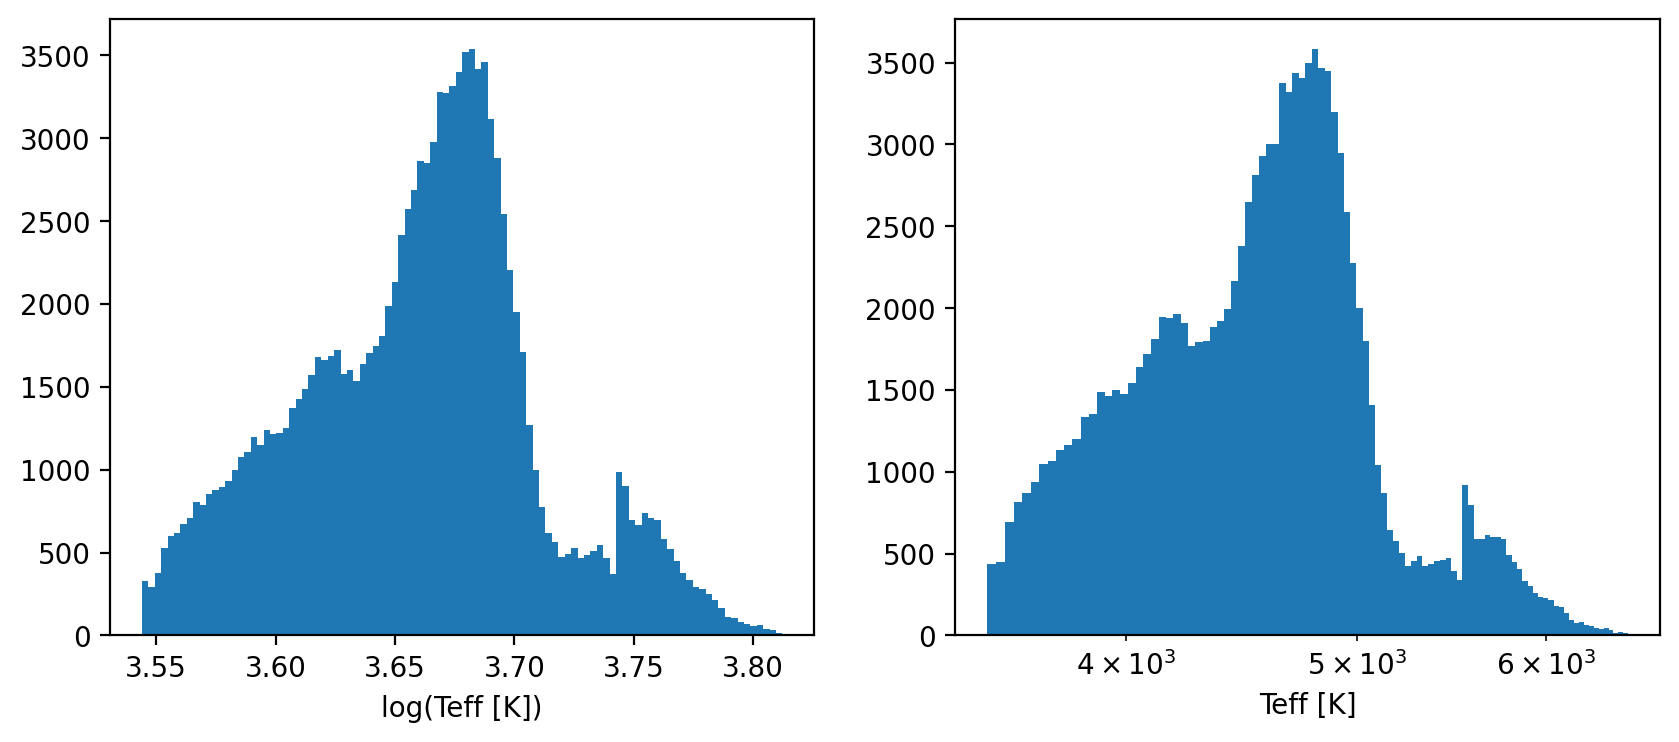

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

# left: take log of variable
### ADD CODE HERE ###
axes[0].hist(np.log10(teff), bins=100)
axes[0].set_xlabel('log(Teff [K])')
#####################


# right: change the x-axis to log scale
axes[1].hist(teff, bins=100)
axes[1].set_xlabel('Teff [K]')

### ADD CODE HERE ###
axes[1].set_xscale('log')
#####################

## Matplotlib Cheatsheets

Matplotlib is very flexible and can make almost any type of plot with any type of styling.  The trickiest part is learning the right keywords to search for so you can find the correct method...which is where the matplotlib cheatsheets can be very helpful:

https://matplotlib.org/cheatsheets/